# Regression with an Abalone Dataset
Author: Morariu Tudor

## Citirea si Prelucrarea Datelor

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [93]:
train_data = pd.read_csv("train.csv");
test_data = pd.read_csv("test.csv");

train_data.drop(columns=['id'], inplace=True);
test_data.drop(columns=['id'], inplace=True);

display(train_data.describe());

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


*   **Obs 1**: Nu exista valori lipsa.
*   **Obs 2**: Coloana "id" este inutile pentry model. :/
*   **Obs 3**: Datele pot fi normalizate.



### Transformarea Dateor in numere

In [94]:
sex_map = {
    "I": 1,
    "F": 2,
    "M": 3
}

train_data["Sex"] = train_data["Sex"].apply(lambda x: sex_map[x]);
test_data["Sex"] = test_data["Sex"].apply(lambda x: sex_map[x]);

display(train_data.describe());

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,1.977200,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.840891,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,3.000000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Normalizarea datelor

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler();
'''
train_data = pd.DataFrame(scaler.fit_transform(train_data));
test_data = pd.DataFrame(scaler.fit_transform(test_data));

train_data["Sex"] = train_data[0];
train_data["Length"] = train_data[1];
train_data["Diameter"] = train_data[2];
train_data["Height"] = train_data[3];
train_data["Whole weight"] = train_data[4];
train_data["Whole weight.1"] = train_data[5];
train_data["Whole weight.2"] = train_data[6];
train_data["Shell weight"] = train_data[7];
train_data["Rings"] = train_data[8];
train_data.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True);

test_data["Sex"] = test_data[0];
test_data["Length"] = test_data[1];
test_data["Diameter"] = test_data[2];
test_data["Height"] = test_data[3];
test_data["Whole weight"] = test_data[4];
test_data["Whole weight.1"] = test_data[5];
test_data["Whole weight.2"] = test_data[6];
test_data["Shell weight"] = test_data[7];
test_data.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7], inplace=True);

'''
display(train_data.describe());

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,1.977200,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.840891,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1.000000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,3.000000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Plotarea Datelor si a Corelatiilor dintre ele

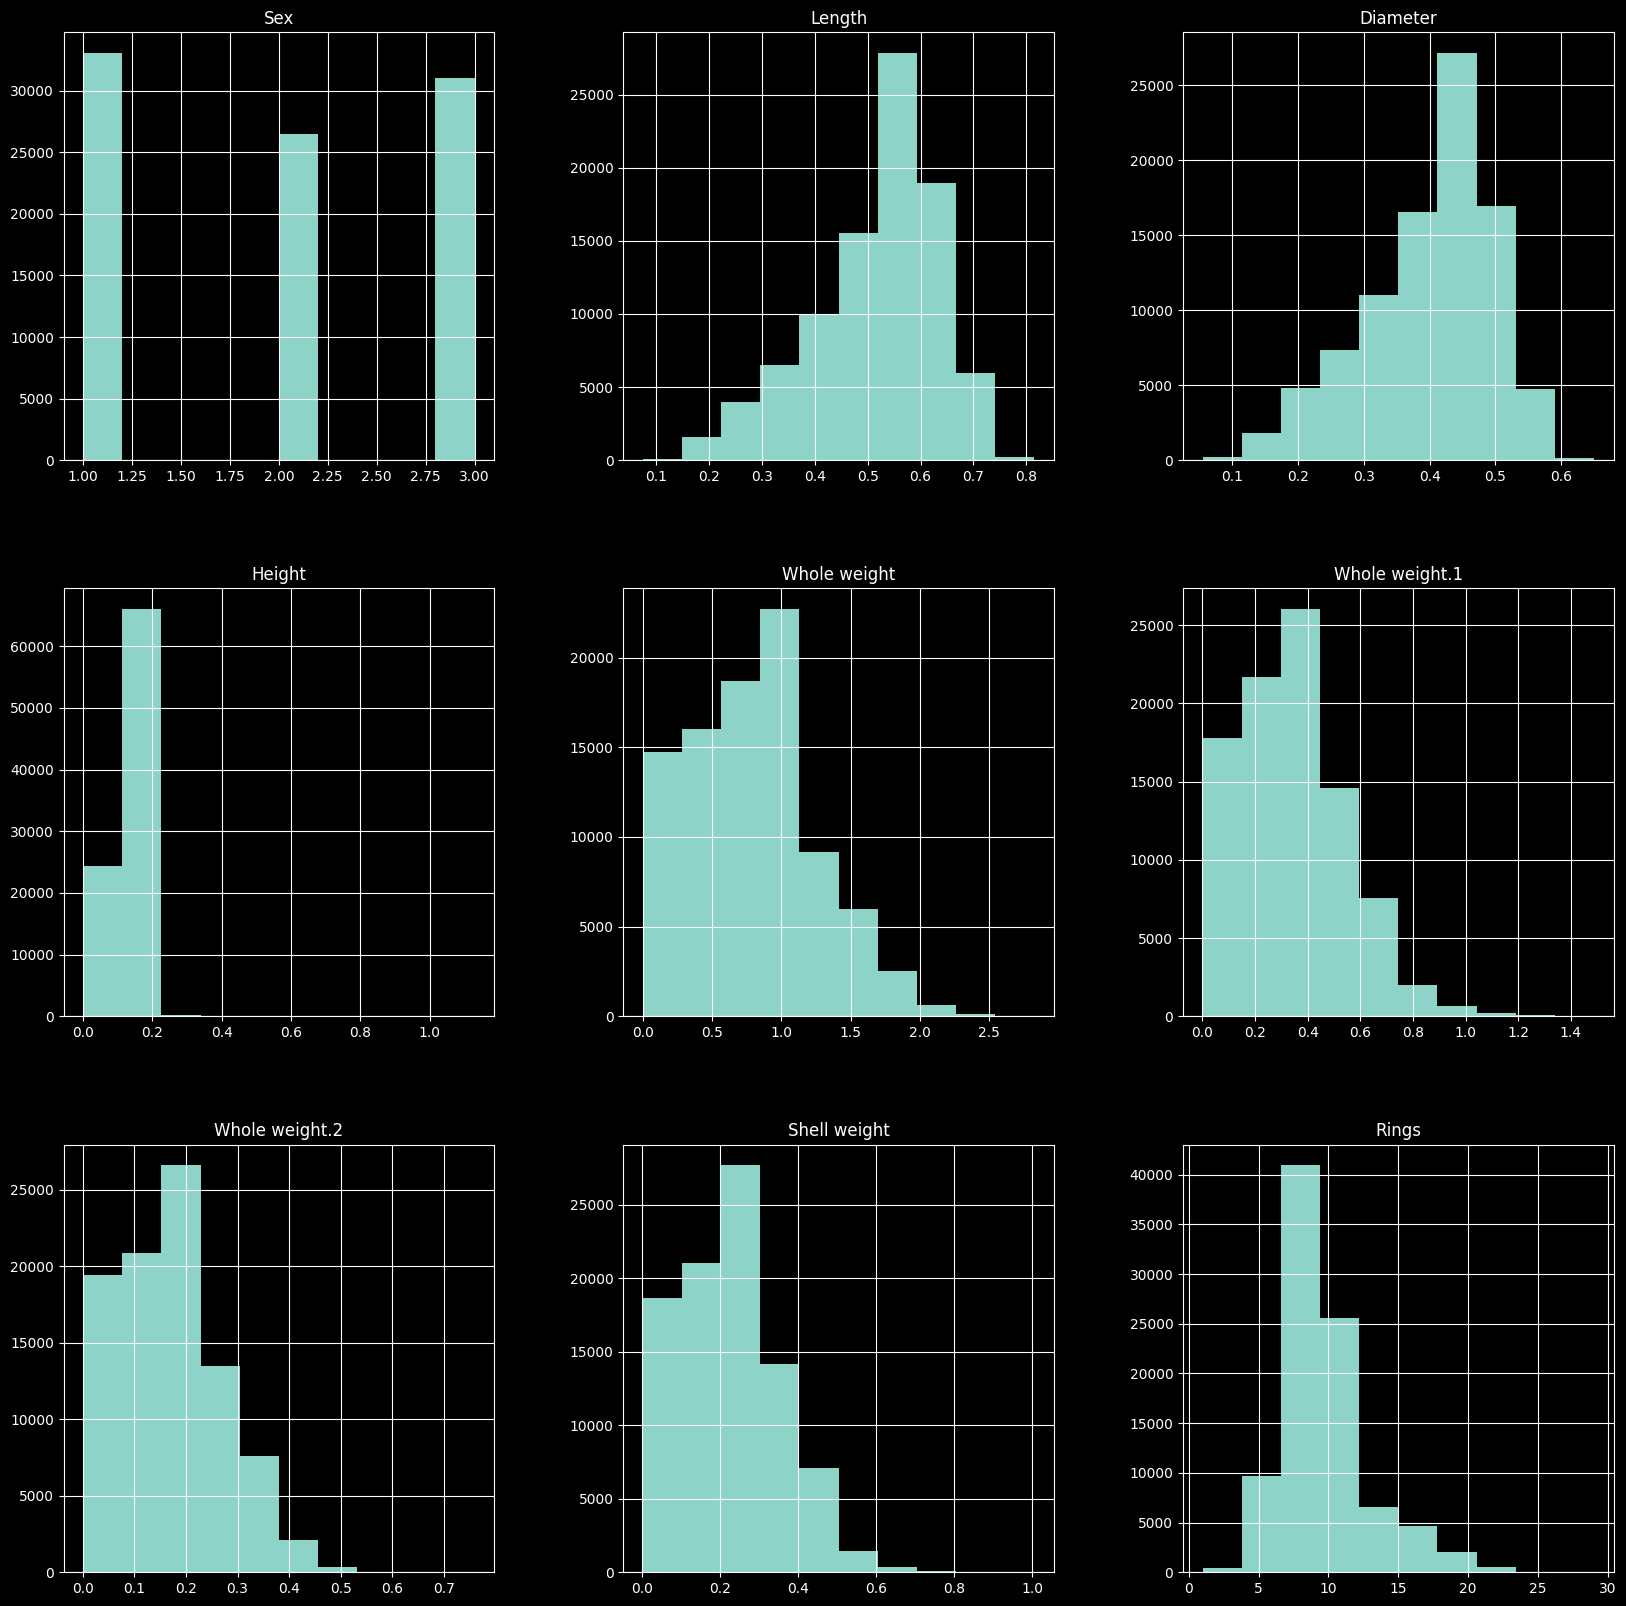

In [96]:
train_data.hist(figsize=(20, 20));

In [97]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Sex,1.000000,0.553968,0.560731,0.540178,0.546160,0.523608,0.539767,0.540904,0.431258
Length,0.553968,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.560731,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.540178,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.546160,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.523608,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.539767,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.540904,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.431258,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


*   **Obs**: In general toate datele sunt corelate intre ele, cu exceptia coloanei "Rings"

### Plot folosind PCA

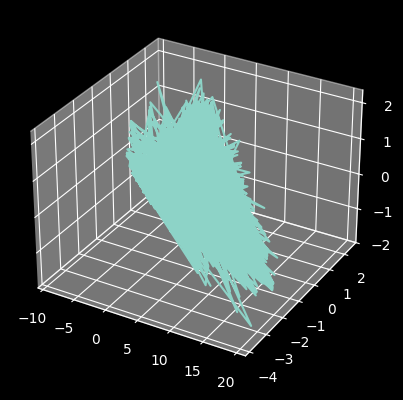

In [98]:
from sklearn.decomposition import PCA

ax = plt.figure().add_subplot(projection='3d')

pca = PCA(n_components=3);

points = pca.fit_transform(train_data)
pointsx = [];
pointsy = [];
pointsz = [];

for x, y, z in points:
    pointsx.append(x);
    pointsy.append(y);
    pointsz.append(z);

ax.plot(pointsx, pointsy, pointsz);

*   Nu arate pre predctibil cu Linear Regression :/

### Train-Test Split

In [99]:
from sklearn.model_selection import train_test_split

train_f, test_f, train_l, test_l = train_test_split(train_data.drop(columns=["Rings"]), train_data["Rings"], test_size=0.3);

display(train_f);
display(train_l);

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
7126,1,0.410,0.305,0.100,0.3075,0.1430,0.0570,0.0920
43256,1,0.400,0.295,0.095,0.2800,0.1200,0.0485,0.0800
56242,1,0.435,0.335,0.110,0.3480,0.1605,0.0810,0.1050
78230,3,0.645,0.510,0.180,1.2815,0.5055,0.3355,0.3550
39521,3,0.480,0.370,0.125,0.5135,0.2415,0.1045,0.1420
...,...,...,...,...,...,...,...,...
74079,3,0.560,0.435,0.135,0.8365,0.3315,0.1905,0.2500
18492,3,0.480,0.390,0.135,1.0640,0.4130,0.2070,0.2000
42873,2,0.645,0.525,0.170,1.4045,0.6345,0.2950,0.3725
89208,2,0.680,0.530,0.165,1.4940,0.7245,0.3555,0.3800


7126      8
43256     7
56242     7
78230    11
39521     8
         ..
74079    11
18492    10
42873     9
89208    16
24934     8
Name: Rings, Length: 63430, dtype: int64

## Alegerea si Antrenarea Modelului

### Modelul

Pentru model am putea folosi pentru inceput Linear Regression.

In [109]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import root_mean_squared_log_error as rmsle

xgb_reg = XGBRegressor(n_estimator=1000)
lgb_reg = LGBMRegressor(n_estimator=1000)
skl_req = LinearRegression();
skl_frs = RandomForestClassifier(max_depth=20, random_state=0);

for model in [xgb_reg, lgb_reg, skl_req, skl_frs]:
    try: 
        model1 = model.fit(train_f, train_l);

        print(rmsle(test_l, model1.predict(test_f)));
    except ValueError:
        print("Model Not GUD");

/Users/tudor/Documents/Work AI/.venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:44:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


0.15280840447332708
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 63430, number of used features: 8
[LightGBM] [Info] Start training from score 9.699117
[LightGBM] [Warning] Unknown parameter: n_estimator
0.15157893261297273
Model Not GUD
0.17405060729575259


## Comparatie intre modelele folosite


### Linear Regression: 

Accuracy de $0.6026671801039649$.

Acuratetea redusa din cauza datelor sparse, dupa cum poate fi vazut plotand dataset-ul cu PCA. 

Vezi figura de mai jos.

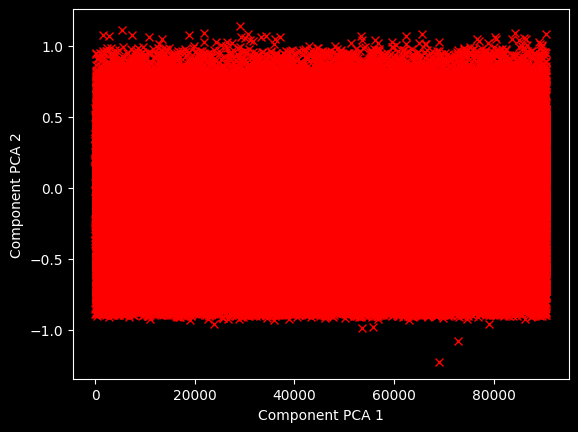

## Idei de Imbunatatire ulterioare

### Feature Engeneering

* Determinarea speciei fiecarei linii, astfel stiind durata de viata/varsta media a speciei.
* Adaugarea unor feature-uri bazate pe feature-urile deja prezente (dimensiune/greutate).

### Selectarea Modelului

* 